In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import datetime as dt
import scipy.stats as stats

#### Import data

In [2]:
dens_vspr = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_vspr_v2.csv')
dens_vspr3 = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_vspr_v3.csv')
dens_admpr = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_admpr_v2.csv')
dens_admpr3 = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_admpr_v3.csv')
dens_rospr = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_rospr.csv')
dens_haropr = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_haropr.csv')

dens_vspr_v4 = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_vspr_v4.csv')
dens_vs4 = dens_vspr_v4[365*2+1:365*6+2].north
dens_pr4 = dens_vspr_v4[365*2+1:365*6+2].south

dens_jdfpr = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_jdfpr.csv')
dens_jdf = dens_jdfpr[365*2+1:365*6+2].north
dens_pr_jdf = dens_jdfpr[365*2+1:365*6+2].south

#Import ros2south data
#Dec 15th 2017 - Dec 27th 2021
rostosouth_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/rostosouth18-21.csv')
datelist_rostosouth = pd.to_datetime(rostosouth_df['Date'])
rostosouth = pd.DataFrame({'Transport':rostosouth_df['Transport'].values},index=datelist_rostosouth)['Transport']

#Import upwelling data
upwelling = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/upwelling_index.csv').iloc[1:,:]
upwelling['time'] = pd.to_datetime(upwelling['time'])
df_avg = upwelling.groupby(pd.Grouper(key='time', freq='D')).mean().reset_index()
df_avg['4mean'] = df_avg.upwelling_index.rolling(window=4, center=True).mean()

upwl_date = df_avg.time.iloc[557:-2*365-182]
upwl_idx = df_avg['4mean'].iloc[557:-2*365-182]
upwl_date = [pd.to_datetime(date).tz_localize(None).to_pydatetime() for date in upwl_date]


/tmp/ipykernel_3897647/423769595.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = upwelling.groupby(pd.Grouper(key='time', freq='D')).mean().reset_index()


In [3]:
dens_pr = dens_vspr[365*2+1:365*6+2].south
dens_vs = dens_vspr[365*2+1:365*6+2].north
dens_adm = dens_admpr[365*2+1:365*6+2].north

dens_pr3 = dens_vspr3[365*2+1:365*6+2].south
dens_vs3 = dens_vspr3[365*2+1:365*6+2].north
dens_adm3 = dens_admpr3[365*2+1:365*6+2].north
dens_haro3 = dens_admpr3[365*2+1:365*6+2].north
dens_ros = dens_rospr[365*2+1:365*6+2].north
dens_haro = dens_haropr[365*2+1:365*6+2].north

datelist = []

date = dt.datetime(2018,1,1)
enddate = dt.datetime(2021,12,31)

while date <= enddate:
    datelist.append(date)
    date += dt.timedelta(days=1)

In [4]:
# Import data and take mean

FR_data = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/FR_discharge.csv')
FR_4mean = FR_data['Discharge (m3/s)'].rolling(window=4,center=True).mean()

date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)

dates = []
datelist_FR = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_FR.append(date)
    date += dt.timedelta(days=1)

In [5]:
#Import puget river data


pugetr_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/puget_rivers_avg.csv')
datelist_pugetr = pd.to_datetime(pugetr_df['Date'])
pugetr = pd.DataFrame({'discharge(kg/m2/s)':pugetr_df['0'].values},index=datelist_pugetr)['discharge(kg/m2/s)'].rolling(window=4,center=True).mean().dropna()
datelist_pugetr = pd.to_datetime(pugetr.index)
date_pugetr = [pd.to_datetime(date).tz_localize(None).to_pydatetime() for date in datelist_pugetr]

pugetr_m3s = pugetr/1026*500*440

### Plot density data

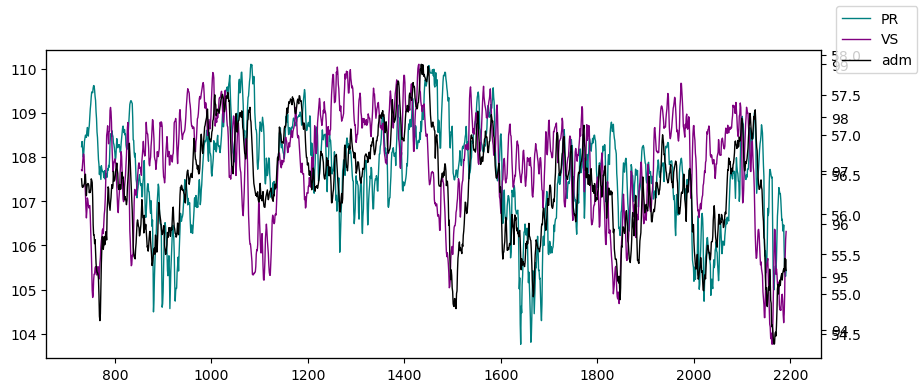

In [6]:
fig,ax = plt.subplots(figsize=(10,4))

ax.plot(dens_pr,color='teal',lw=1,label='PR')
ax2 = ax.twinx()
ax2.plot(dens_vs,color='purple',lw=1,label='VS')
ax3 = ax.twinx()
ax3.plot(dens_adm,color='k',lw=1,label='adm')
fig.legend()

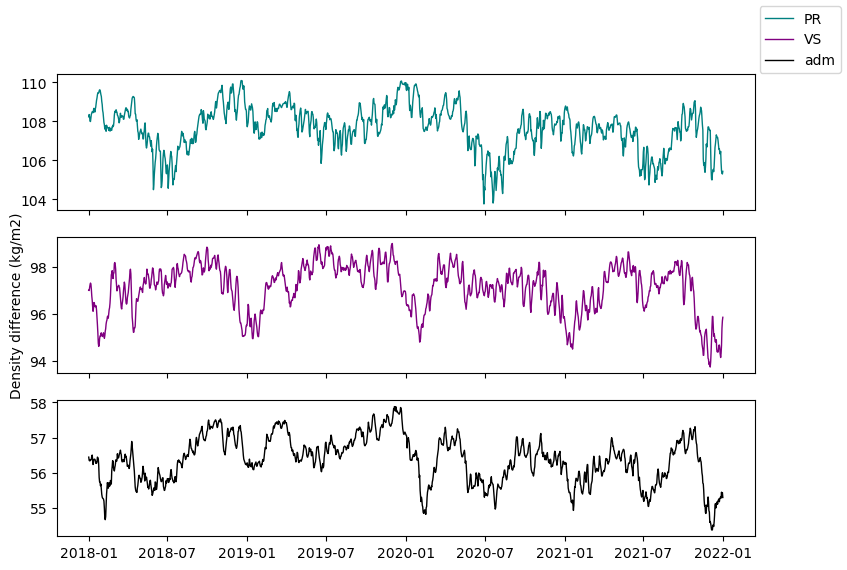

In [7]:
fig,[ax,ax2,ax3] = plt.subplots(3,1,figsize=(9,6),sharex=True)

ax.plot(datelist,dens_pr,color='teal',lw=1,label='PR')
ax2.plot(datelist,dens_vs,color='purple',lw=1,label='VS')
ax3.plot(datelist,dens_adm,color='k',lw=1,label='adm')

# ax.set_ylabel('Density difference (kg/m2)')
ax2.set_ylabel('Density difference (kg/m2)')
# ax3.set_ylabel('Density difference (kg/m2)')

fig.legend()

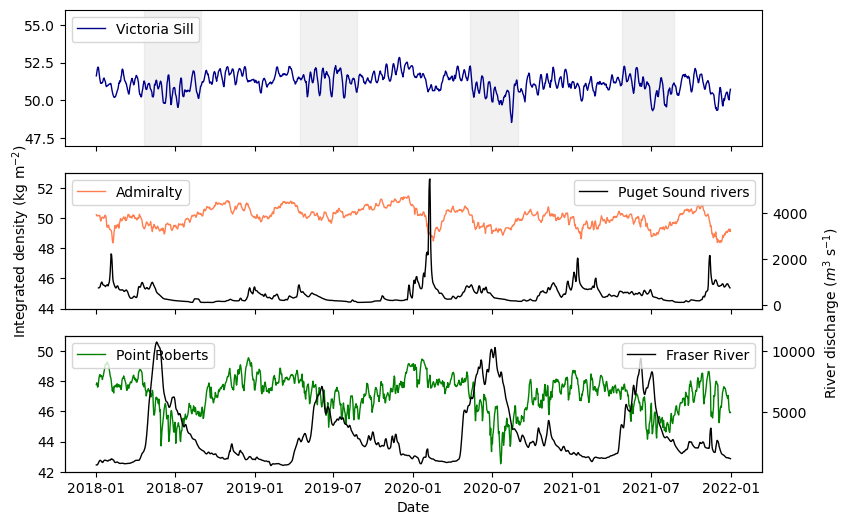

In [8]:
fig,[ax2,ax3,ax] = plt.subplots(3,1,figsize=(9,6),sharex=True)

ax.plot(datelist,dens_pr3,color='green',lw=1,label='Point Roberts')
ax2.plot(datelist,dens_vs3,color='darkblue',lw=1,label='Victoria Sill')
ax3.plot(datelist,dens_adm3,color='coral',lw=1,label='Admiralty')
ax.legend(loc=2)
ax2.legend(loc=2)
ax3.legend(loc=2)

ax02 = ax.twinx()
ax02.plot(datelist_FR[365:-365],FR_4mean[365:-365],color='k',lw=1,label='Fraser River')

ax32 = ax3.twinx()
ax32.plot(pugetr_m3s[25:-365],color='k',lw=1,label='Puget Sound rivers')

ax02.legend(loc=1)
ax32.legend(loc=1)


ax3.set_ylabel(f'Integrated density (kg m$^{{-2}}$)')
ax.set_xlabel('Date')
ax02.set_ylabel(f'                                         River discharge ($m^3$ s$^{{-1}}$)')


ax2.set_ylim(47,56)
# ax2.set_ylim(78,86)
ax3.set_ylim(44,53)
ax.set_ylim(42,51)
# ax2.set_yticks(np.arange(47,56,2));
ax3.set_yticks(np.arange(44,53,2));
ax.set_yticks(np.arange(42,51,2));

ax2.fill_betweenx(y=np.linspace(ax2.get_ylim()[0], ax2.get_ylim()[1], 100),x1=upwl_date[110],x2=upwl_date[240],color='lightgrey', alpha=0.3)
ax2.fill_betweenx(y=np.linspace(ax2.get_ylim()[0], ax2.get_ylim()[1], 100),x1=upwl_date[470],x2=upwl_date[600],color='lightgrey', alpha=0.3)
ax2.fill_betweenx(y=np.linspace(ax2.get_ylim()[0], ax2.get_ylim()[1], 100),x1=upwl_date[860],x2=upwl_date[970],color='lightgrey', alpha=0.3)
ax2.fill_betweenx(y=np.linspace(ax2.get_ylim()[0], ax2.get_ylim()[1], 100),x1=upwl_date[1210],x2=upwl_date[1330],color='lightgrey', alpha=0.3)

In [9]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/dens_and_rivers.png',bbox_inches='tight')

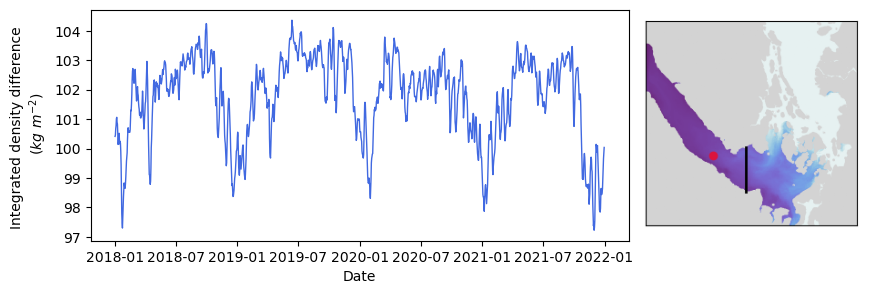

In [10]:
fig,[ax,ax2] = plt.subplots(1,2,figsize=(10,3),gridspec_kw={'width_ratios':[3,1.3]})

ax.plot(datelist,dens_jdf,color='royalblue',lw=1,label='JdF')
ax.set_xlabel('Date')
ax.set_ylabel(f'Integrated density difference \n ($kg$ $m^{{-2}}$)')

ax2.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/jdf_dens_loc.png'))
ax2.axis('off')

fig.subplots_adjust(wspace=0.01)
# ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=upwl_date[110],x2=upwl_date[240],color='lightgrey', alpha=0.3)
# ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=upwl_date[470],x2=upwl_date[600],color='lightgrey', alpha=0.3)
# ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=upwl_date[860],x2=upwl_date[970],color='lightgrey', alpha=0.3)
# ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=upwl_date[1210],x2=upwl_date[1330],color='lightgrey', alpha=0.3)

In [11]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/jdf_dens_wmap.png',bbox_inches='tight')

The incoming deep water from JdF Strait is strongly infleunced by the upwelling cycle on the outer coast of Vancouver Island. The upwelling influence is clearly seen in the integrated density further into JdF Strait (see supplemental figure), however at Victoria Sill the upwelling signal is diluted because of the freshwater input and remains more constant year round (Figure X). The freshwater influence is from two competing river systems, the Fraser River and the rivers in Puget Sound. The Fraser River dominates the density at the Point Roberts with lower density during the freshet while the density at Admiralty Inlet is more strongly correlated to the rivers in Puget Sound (Figure X). The rivers in Puget Sound are rainfall fed as opposed to snow-melt fed like the Fraser River and as such, have the opposite seasonal cycle to the Fraser River with higher outflow from November - April. Since the upwelling signal is diffuse by the time it reaches Victoria Sill, the two river systems are the primary controls on the density difference across the SJGI region, which is the strongest driving force for water transport.


In [12]:
stats.iqr(dens_vs3)*2,stats.iqr(dens_pr3)*2,stats.iqr(dens_adm3)*2

(1.7012283893386666, 3.1570083282447428, 1.8381599309676488)

The integrated density at the Point Roberts transect has a strong seasonal cycle that closely follows the seasonality of the Fraser River freshet, while at the Admiralty Inlet transect, the integrated density is better correlated with the rivers in Puget Sound. The density at Admiralty Inlet is also influenced by the Fraser River discharge but there is a stronger correlation to the river discharge in Puget Sound. The density at Victoria Sill remains more constant all year round, without a clear relationship to either the Fraser River or the rivers in Puget Sound. The density at Victoria Sill is more strongly impacted by the seasonal upwelling cycle which brings in denser water via the JdF Strait from May - October, which opposes the less dense water from the Fraser River during this same time period. As such, the seasonalinty of the upwelled dense water and the Fraser River discharge almost balance out and there is more constant density at Victoria Sill year round than at Admiralty Inlet and Point Roberts.

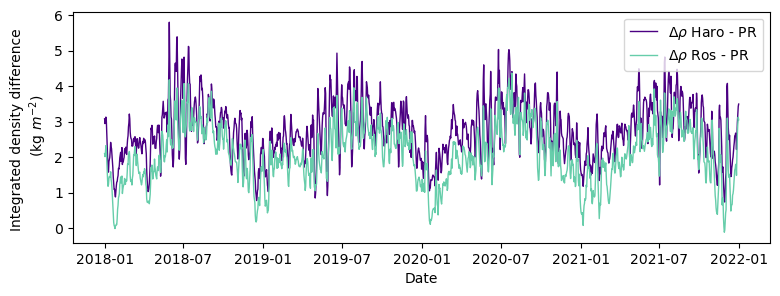

In [13]:
# plt.plot(dens_diff3_haroN)
DD_haroros = (dens_haropr.north[365*2+1:365*6+2]-dens_haropr.south[365*2+1:365*6+2]) - (dens_rospr.north[365*2+1:365*6+2]-dens_rospr.south[365*2+1:365*6+2])

fig,ax = plt.subplots(figsize=(9,3))

ax.plot(datelist,dens_haropr.north[365*2+1:365*6+2]-dens_haropr.south[365*2+1:365*6+2],label=f'$\\Delta \\rho$ Haro - PR',color='indigo',lw=1)
ax.plot(datelist,dens_rospr.north[365*2+1:365*6+2]-dens_rospr.south[365*2+1:365*6+2],label=f'$\\Delta \\rho$ Ros - PR',color='mediumaquamarine',lw=1)
# ax.plot(datelist,DD_haroros,label='haro - ros ',color='purple',lw=1)
# ax2 = ax.twinx()
# ax2.plot(datelist_rostosouth,rostosouth,color='teal',lw=1,label='rostosouth')
# ax.plot(datelist,color='k')
ax.set_xlabel('Date')
ax.set_ylabel(f'Integrated density difference \n (kg $m^{{-2}}$)')
ax2.set_ylabel(f'South flow through rosario ($m^3$ $s^{{-1}}$)')
ax.legend(loc=1)

In [14]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/density_haroros.png',bbox_inches='tight')

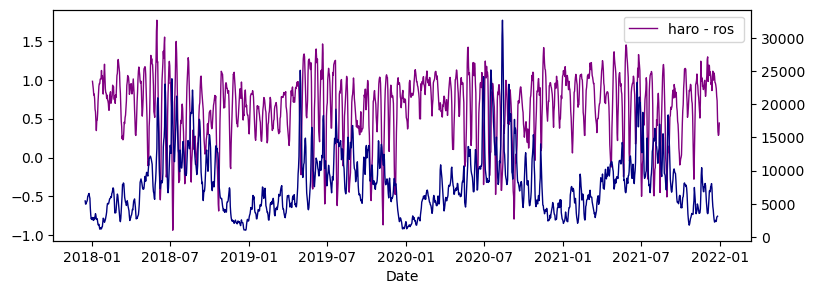

In [15]:
# plt.plot(dens_diff3_haroN)
DD_haroros = (dens_haropr.north[365*2+1:365*6+2]-dens_haropr.south[365*2+1:365*6+2]) - (dens_rospr.north[365*2+1:365*6+2]-dens_rospr.south[365*2+1:365*6+2])

fig,ax = plt.subplots(figsize=(9,3))

# ax.plot(datelist,dens_haropr.north[365*2+1:365*6+2]-dens_haropr.south[365*2+1:365*6+2],label=f'$\\Delta \\rho$ Haro - PR',color='indigo',lw=1)
# ax.plot(datelist,dens_rospr.north[365*2+1:365*6+2]-dens_rospr.south[365*2+1:365*6+2],label=f'$\\Delta \\rho$ Ros - PR',color='mediumaquamarine',lw=1)
ax.plot(datelist,DD_haroros,label='haro - ros ',color='purple',lw=1)
ax2 = ax.twinx()
ax2.plot(datelist_rostosouth,rostosouth,color='navy',lw=1,label='rostosouth')
# ax.plot(datelist,color='k')
ax.set_xlabel('Date')
# ax.set_ylabel(f'Integrated density difference \n (kg $m^{{-2}}$)')
# ax2.set_ylabel(f'South flow through rosario ($m^3$ $s^{{-1}}$)')
ax.legend(loc=1)

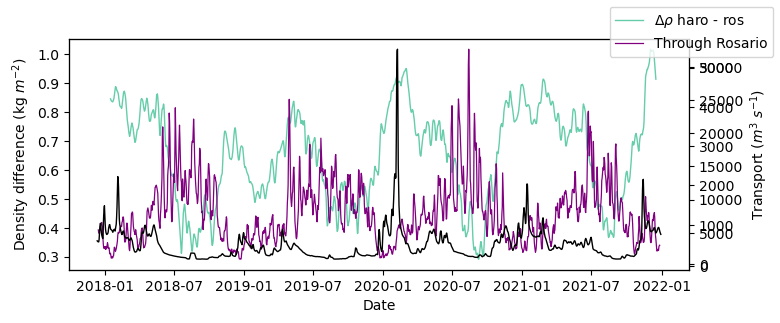

In [16]:
DD_haroros_rollmean = DD_haroros.rolling(30, center=True).mean()

fig,ax2 = plt.subplots(1,1,figsize=(8,3),sharex=True)

#############
#Density
#############


# ax1.plot(datelist,dens_haropr.north[365*2+1:365*6+2]-dens_haropr.south[365*2+1:365*6+2],label=f'$\\Delta \\rho$ Haro - PR',color='indigo',lw=1)
# ax1.plot(datelist,dens_rospr.north[365*2+1:365*6+2]-dens_rospr.south[365*2+1:365*6+2],label=f'$\\Delta \\rho$ Ros - PR',color='mediumaquamarine',lw=1)
# ax1.legend(loc=1)
# ax1.set_ylabel(f'Density difference (kg m$^{{-2}}$)                                   ')
# ax1.set_xlabel('Date')

# ax2.plot(datelist,DD_haroros,lw=1,color='powderblue',label='$\\Delta \\rho$ haro - ros')
ax2.plot(datelist,DD_haroros_rollmean,lw=1,color='mediumaquamarine',label='$\\Delta \\rho$ haro - ros',zorder=1)
# ax2.legend(loc=4)
ax3 = ax2.twinx()
ax3.plot(rostosouth,color='purple',lw=0.9,zorder=0,label='Through Rosario')
# ax03.plot(pugetr_m3s[25:-365],color='k',lw=1,label='Puget Sound rivers')

ax2.set_xlabel('Date')
ax2.set_ylabel(f'Density difference (kg $m^{{-2}}$)')
ax3.set_ylabel(f'Transport ($m^{{3}}$ $s^{{-1}}$)')

ax4 = ax2.twinx()
# ax4.plot(datelist_FR[365:-365],FR_4mean[365:-365],color='k',lw=1,label='Fraser River',ls='--')
ax4.plot(datelist_pugetr[:-365],pugetr_m3s[:-365],color='k',lw=1)

fig.legend()

fig.subplots_adjust(hspace=0.25)

/tmp/ipykernel_3897647/3298220653.py:19: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.01)
/tmp/ipykernel_3897647/3298220653.py:34: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.15)


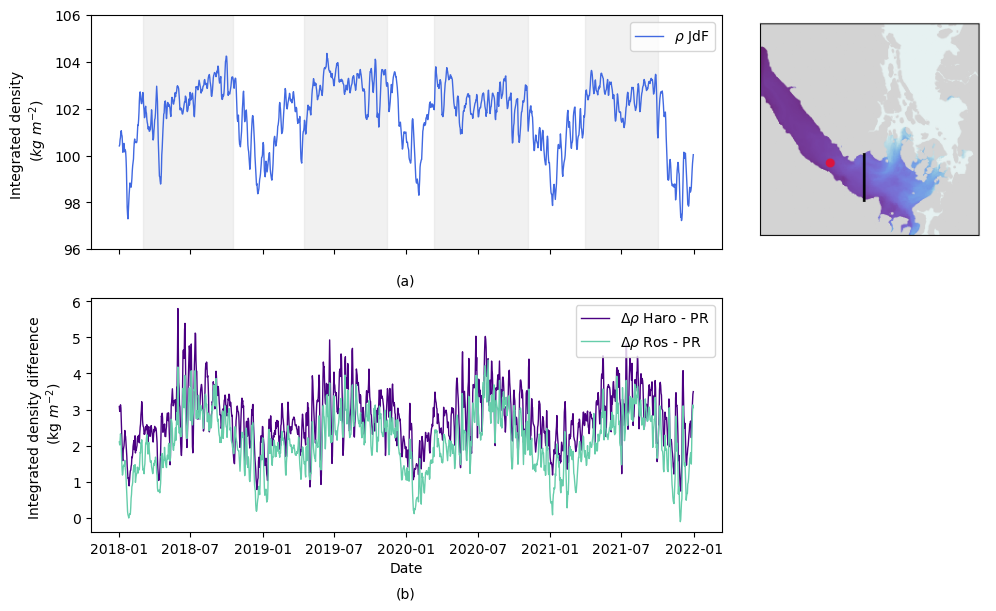

In [18]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True, figsize=[10,6])
gs = GridSpec(2,10, figure=fig)

ax = fig.add_subplot(gs[0, :7]) 
ax2 = fig.add_subplot(gs[0,7:])
ax3 = fig.add_subplot(gs[1,:7])

ax.plot(datelist,dens_jdf,color='royalblue',lw=1,label=f'$\\rho$ JdF')
ax.set_ylabel(f'Integrated density \n ($kg$ $m^{{-2}}$)')
ax.set_ylim(96,106)
ax.set_xticklabels('')
ax.legend()

ax2.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/jdf_dens_loc.png'))
ax2.axis('off')

fig.subplots_adjust(wspace=0.01)
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=upwl_date[60],x2=upwl_date[290],color='lightgrey', alpha=0.3)
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=upwl_date[470],x2=upwl_date[680],color='lightgrey', alpha=0.3)
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=upwl_date[800],x2=upwl_date[1040],color='lightgrey', alpha=0.3)
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=upwl_date[1185],x2=upwl_date[1370],color='lightgrey', alpha=0.3)

ax3.plot(datelist,dens_haropr.north[365*2+1:365*6+2]-dens_haropr.south[365*2+1:365*6+2],label=f'$\\Delta \\rho$ Haro - PR',color='indigo',lw=1)
ax3.plot(datelist,dens_rospr.north[365*2+1:365*6+2]-dens_rospr.south[365*2+1:365*6+2],label=f'$\\Delta \\rho$ Ros - PR',color='mediumaquamarine',lw=1)
ax3.set_xlabel('Date')
ax3.set_ylabel(f'Integrated density difference \n (kg $m^{{-2}}$)')
ax3.legend(loc=1)

ax.text(0.483, -0.15, "(a)", transform=ax.transAxes)
ax3.text(0.483, -0.28, "(b)", transform=ax3.transAxes)

fig.subplots_adjust(hspace=0.15)

In [19]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/dens_supp.png',bbox_inches='tight')